# remplacer les NaN par la moyenne 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
echange = 0.011
def prix_euro(price):
    return price * 100000 * echange
data["prix_euro"] = data["Price"].map(prix_euro)

In [5]:
data['marque_modele'] = data['Name'].str.split(' ', n=2, expand=True).iloc[:, :2].agg(' '.join, axis=1)

In [6]:
data.drop(["Name","Price","New_Price","Location"], axis=1, inplace=True)
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1925.0,Maruti Wagon
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,13750.0,Hyundai Creta
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4950.0,Honda Jazz
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6600.0,Maruti Ertiga
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,19514.0,Audi A4


In [10]:
# convertir str => float
data['Engine'] = data['Engine'].str.replace("CC", "").astype(float, errors='ignore')
data['Power'] = pd.to_numeric(data['Power'].str.replace("bhp", ""), errors="coerce")
data["Mileage"] = data["Mileage"].str.replace("km/kg", "")
data["Mileage"] = data["Mileage"].str.replace("kmpl", "").astype(float, errors='ignore')

In [11]:
data[data["Fuel_Type"] == "Electric"]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele


In [ ]:
# supprimer les deux ligne de Fuel_Type = Electric parceque on a juste deux lignes
data.drop([4446,4904], axis=0, inplace=True)

In [14]:
data[data.isna().any(axis=1)].groupby("marque_modele").size()

marque_modele
Audi A4                   1
BMW 5                     5
Chevrolet Optra           1
Fiat Petra                1
Fiat Punto                3
Fiat Siena                1
Ford Endeavour            2
Ford Fiesta               3
Ford Figo                 1
Honda CR-V                2
Honda City                5
Honda Jazz                1
Hyundai Santro           49
Land Rover                3
Mahindra Bolero           1
Mahindra Jeep             2
Maruti 1000               1
Maruti Baleno             2
Maruti Esteem             3
Maruti Estilo             3
Maruti Swift             26
Maruti Wagon              1
Mercedes-Benz E-Class     2
Nissan Micra              1
Nissan Teana              1
Porsche Cayman            2
Skoda Laura               1
Smart Fortwo              1
Tata Indica               3
Toyota Etios             14
Toyota Qualis             2
Volkswagen Jetta          1
dtype: int64

In [16]:
data.isna().sum() # les valeur manquente 

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 42
prix_euro              0
marque_modele          0
dtype: int64

In [ ]:
# remplacer NaN par la moyenne => fini
data[data["Engine"].isna()].groupby("marque_modele").size() 

Series([], dtype: int64)

In [36]:
data.loc[data["Engine"].isna(), "Engine"] = np.round(np.mean((data["Engine"])))

In [ ]:
# remplacer NaN par la moyenne => fini
data[data["Power"].isna()].groupby("marque_modele").size() 

Series([], dtype: int64)

In [40]:
data.loc[data["Power"].isna(), "Power"] = np.round(np.mean((data["Power"])))

In [ ]:
# remplacer NaN par la moyenne => fini
data[data["Seats"].isna()].groupby("marque_modele").size() 

Series([], dtype: int64)

In [44]:
data.loc[data["Seats"].isna(), "Seats"] = np.round(np.mean((data["Seats"])))

In [47]:
data.isna().sum() # pas de valeur manquente 

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
prix_euro            0
marque_modele        0
dtype: int64

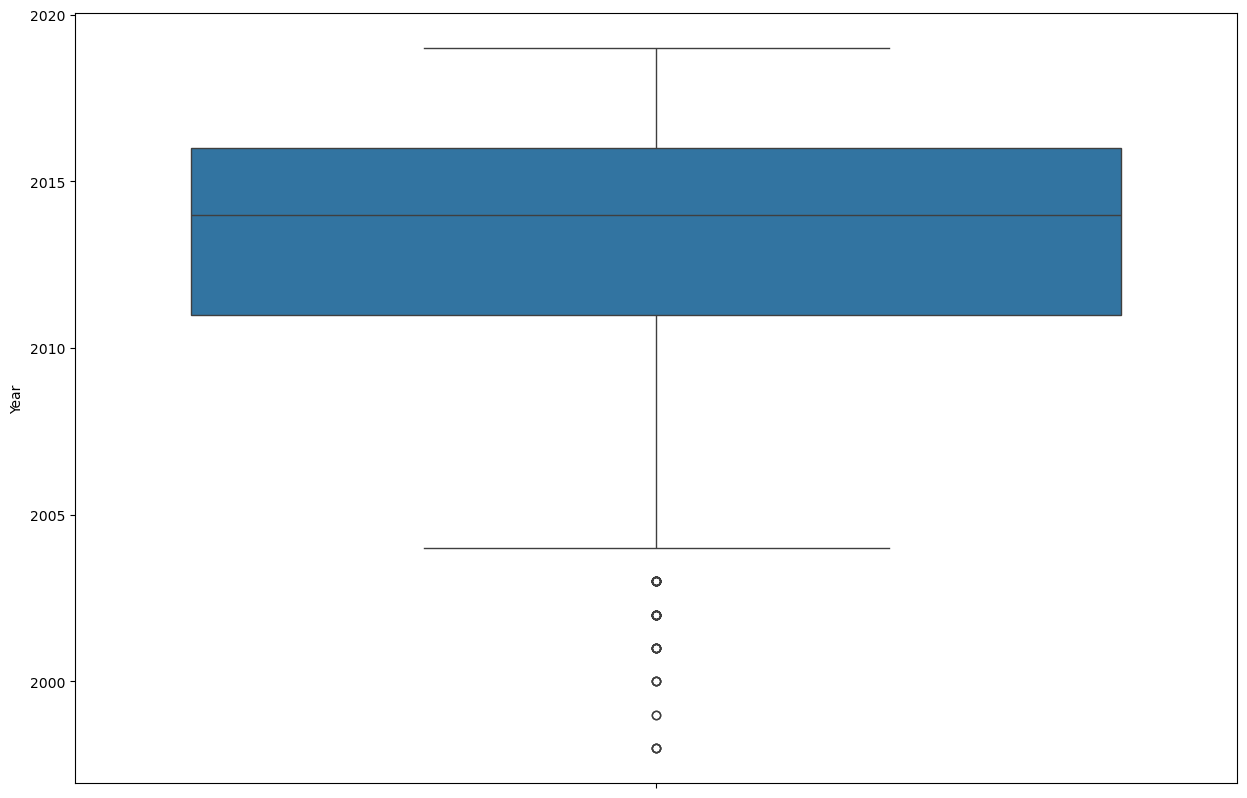

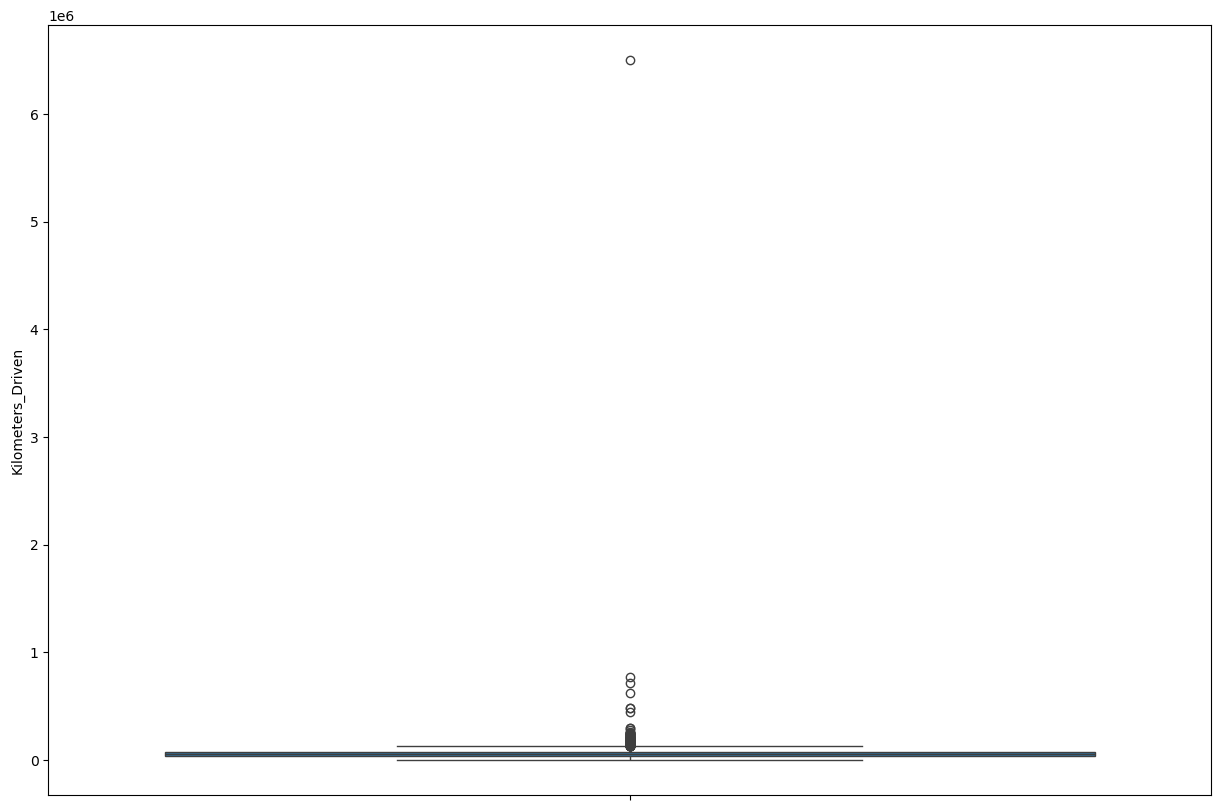

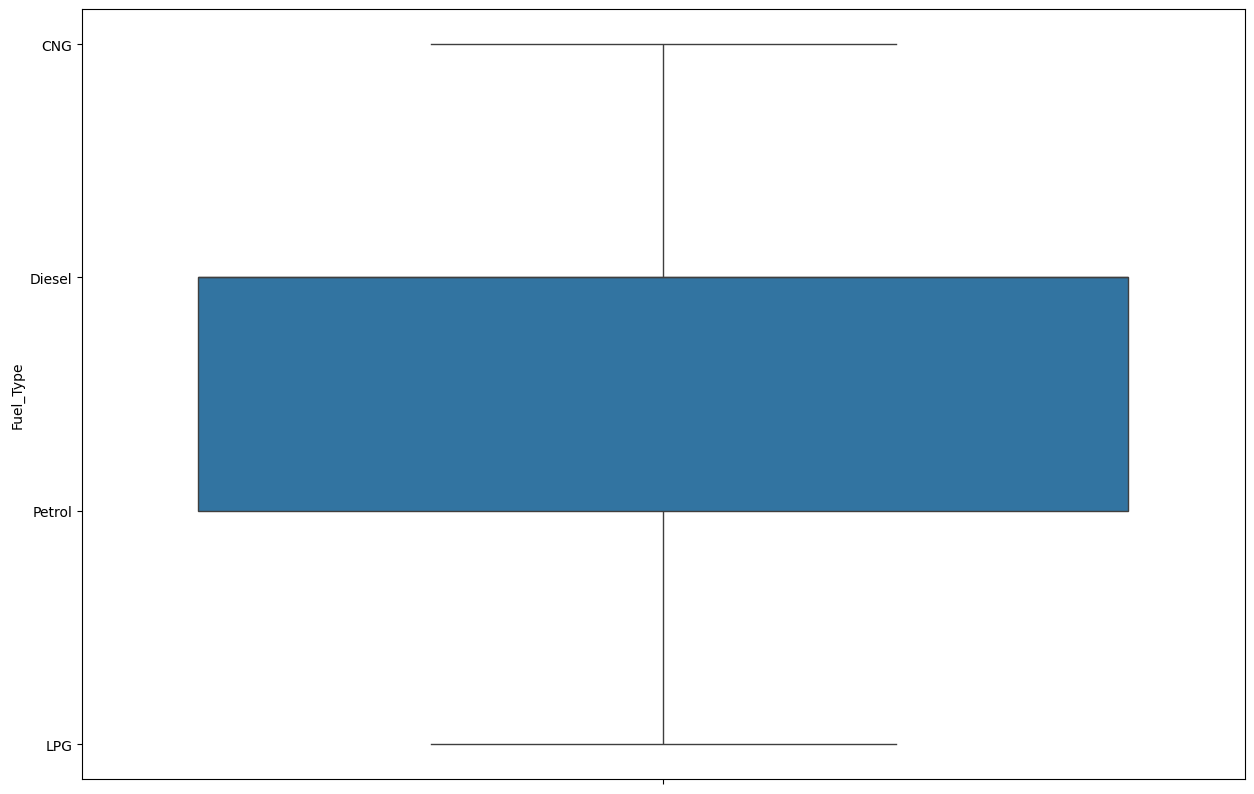

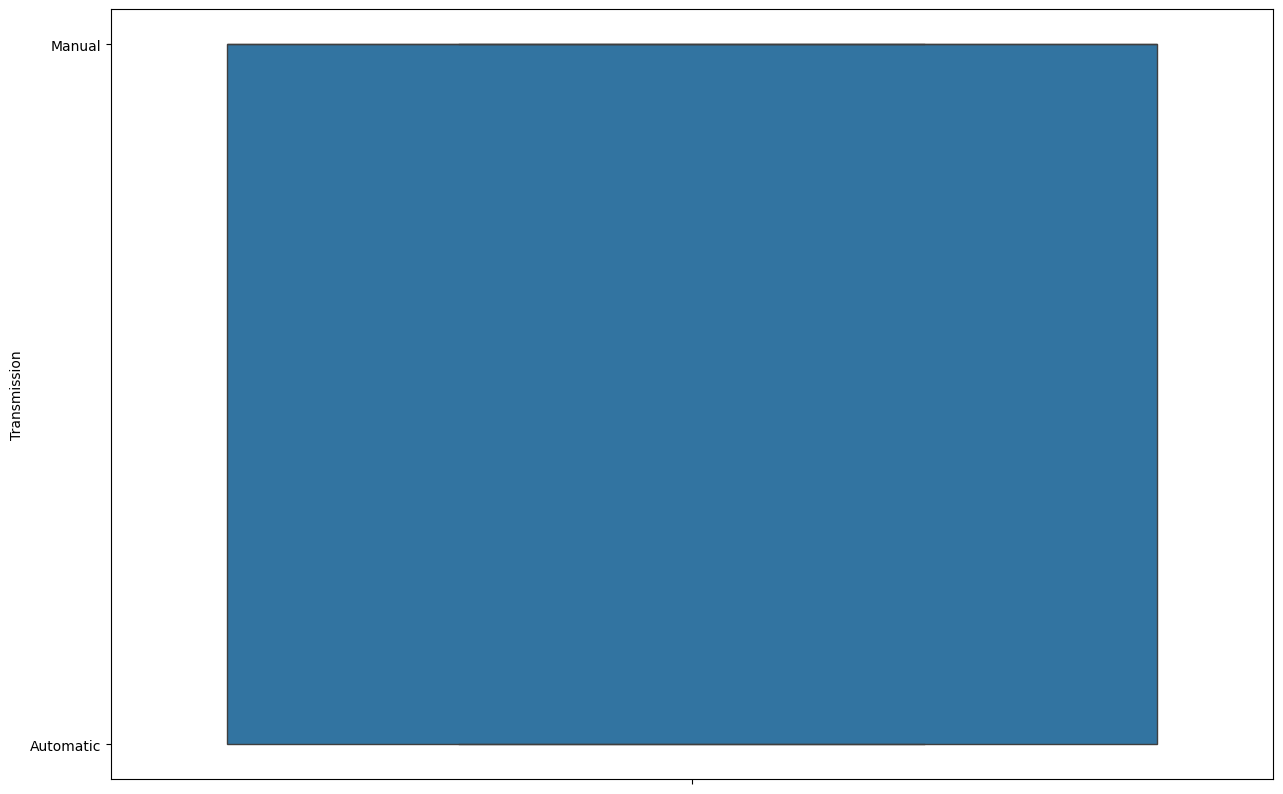

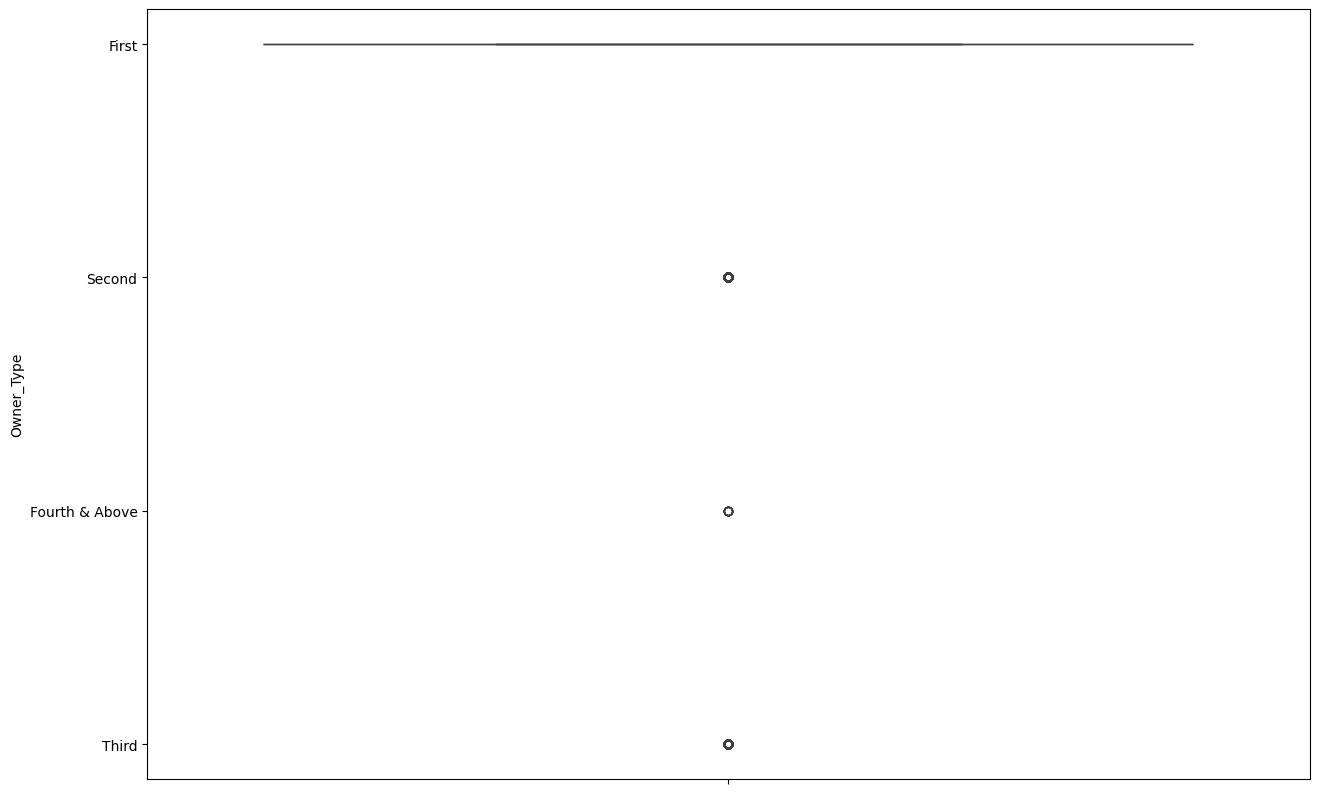

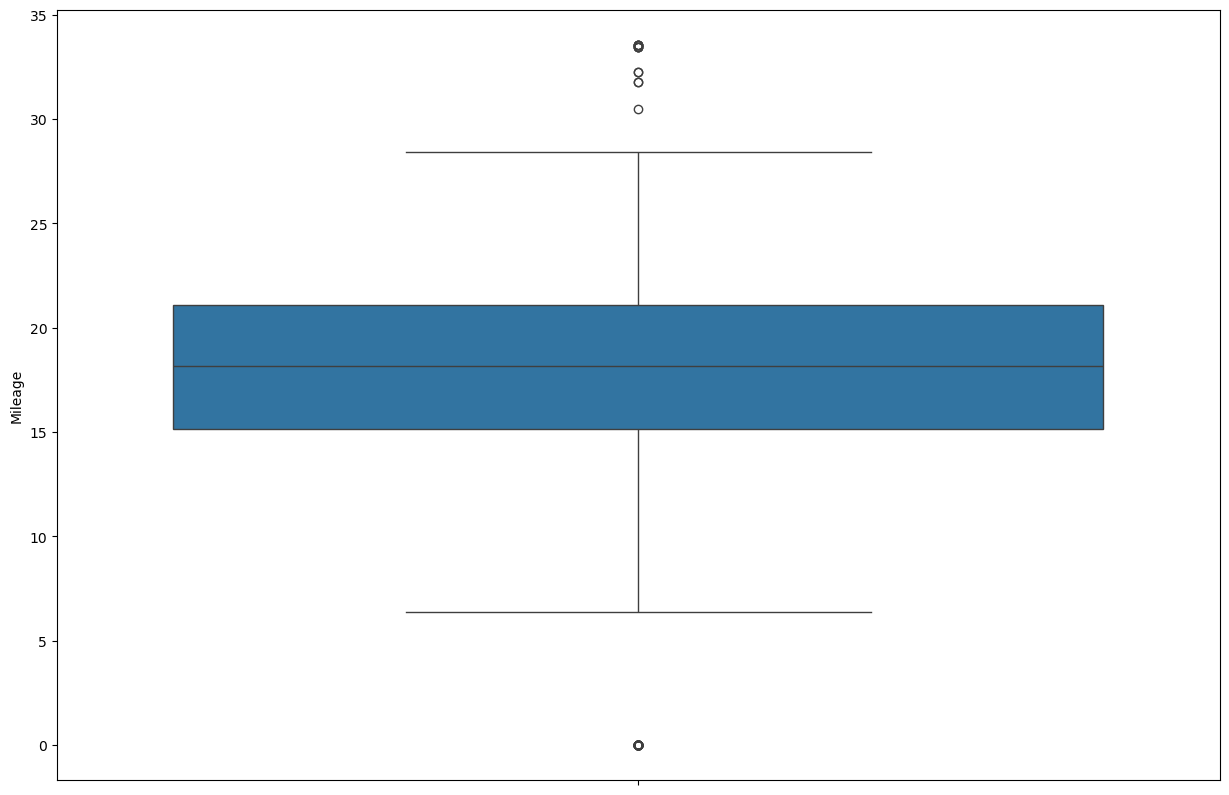

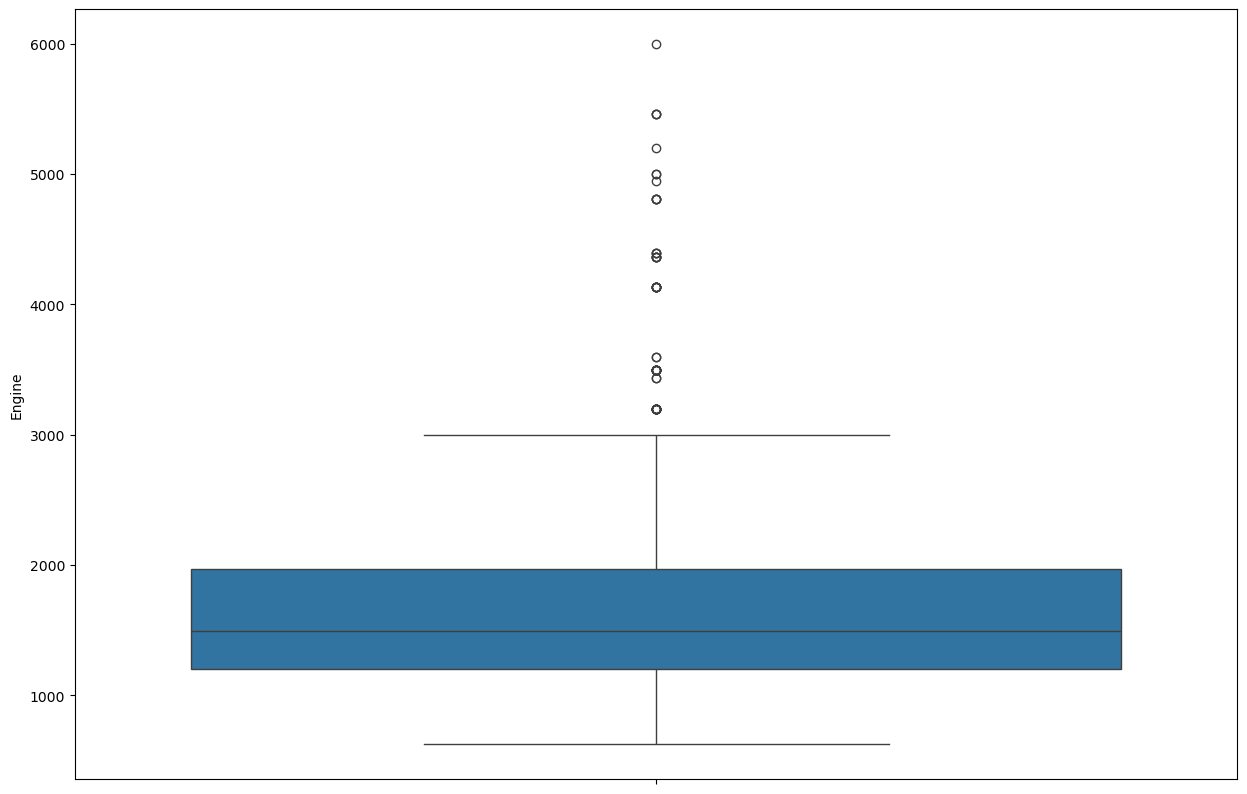

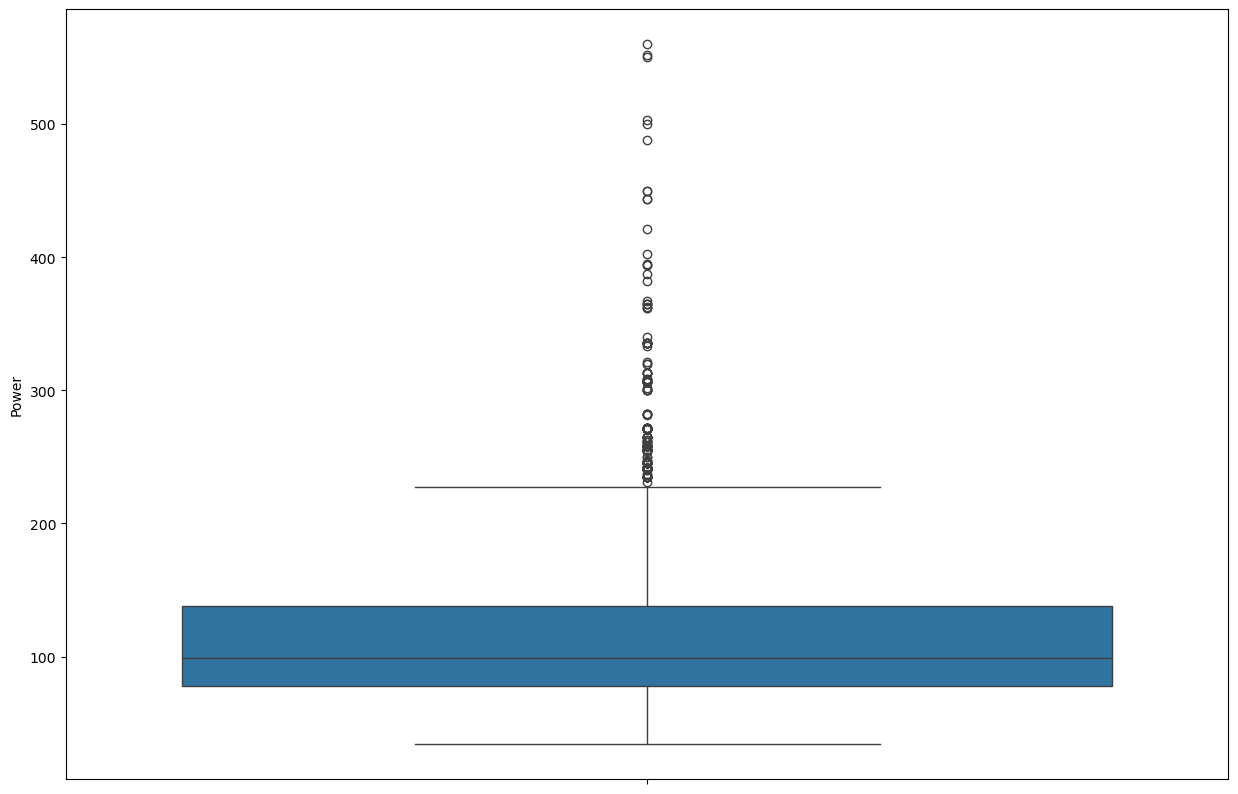

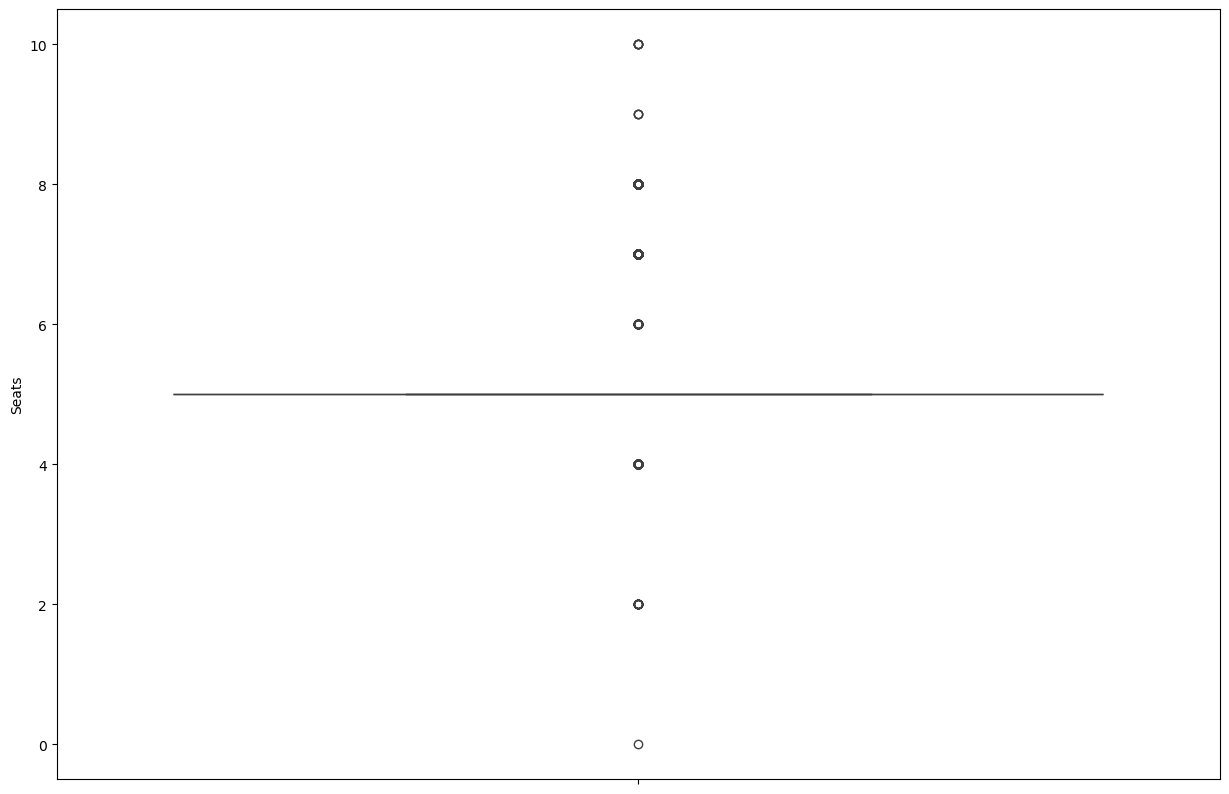

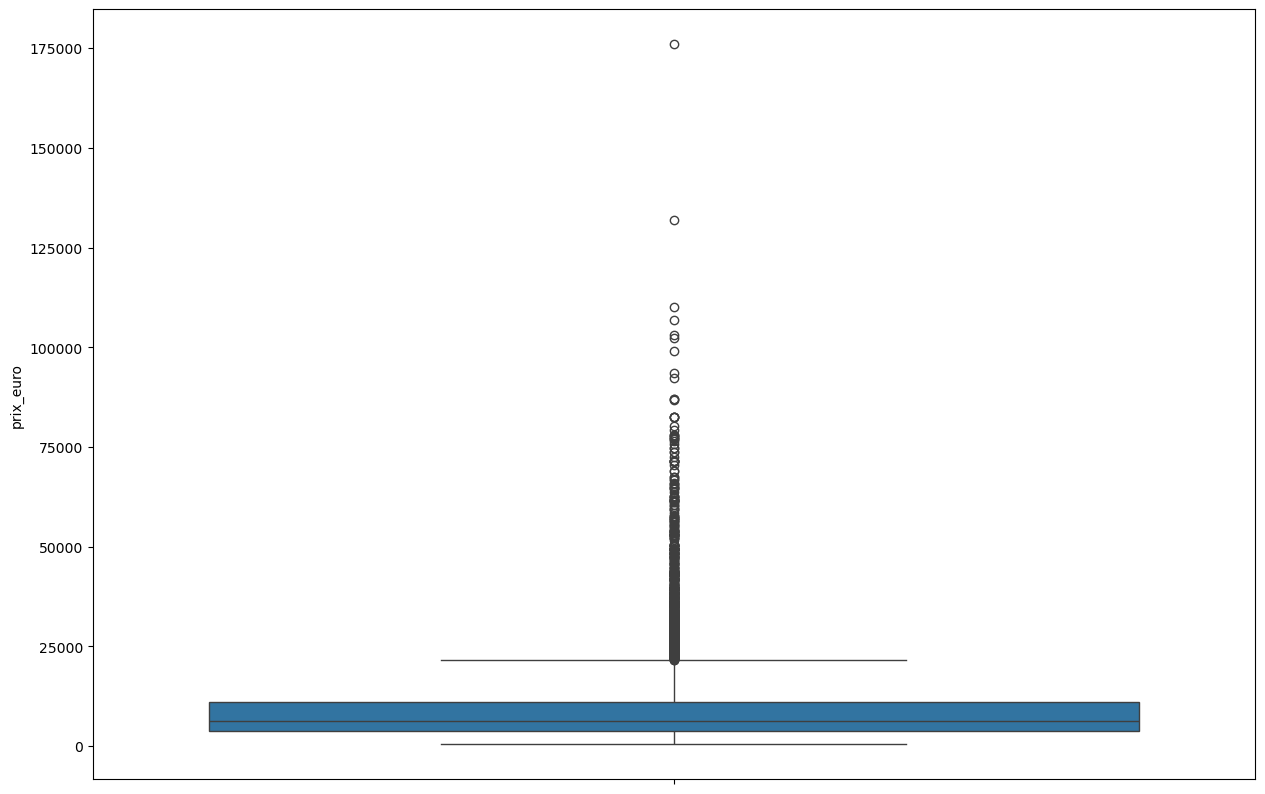

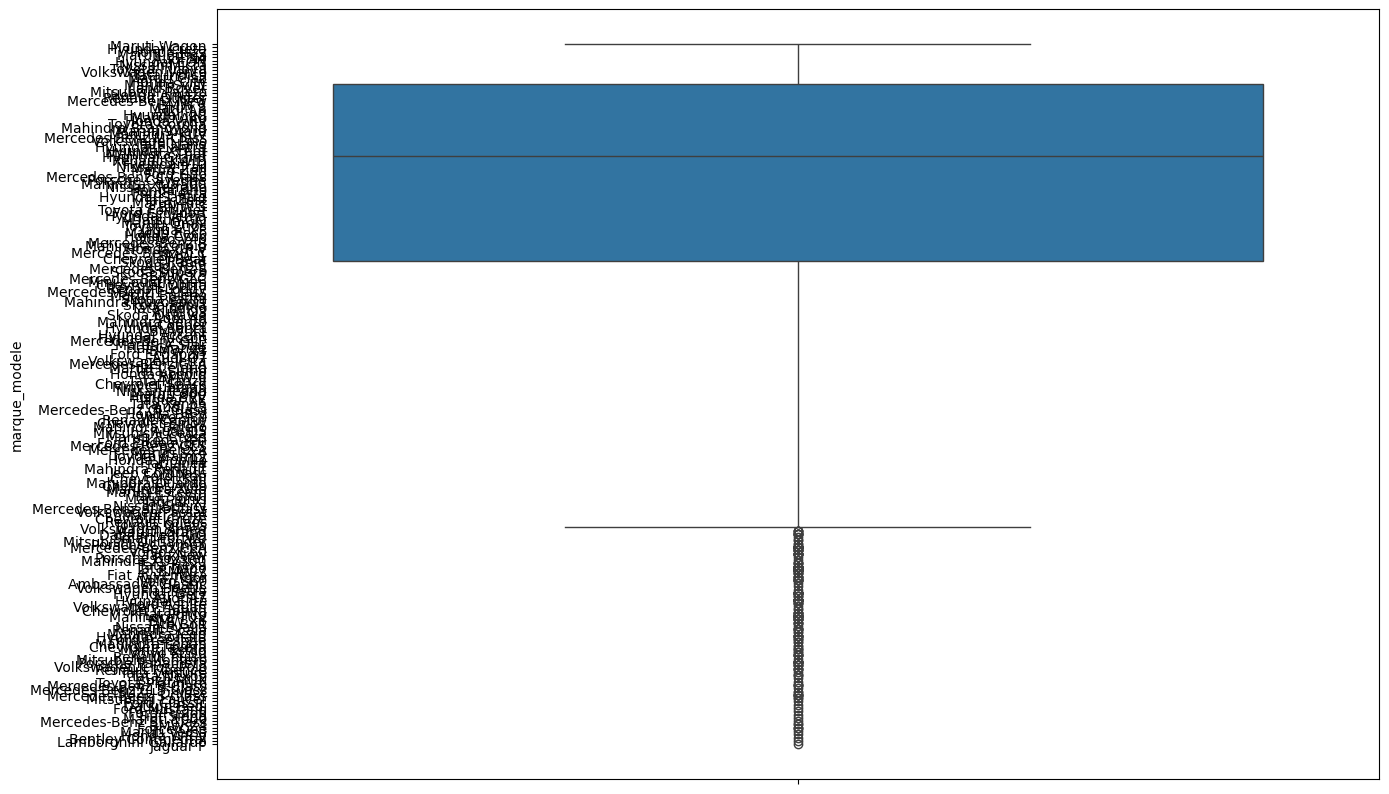

In [51]:
for col in data.columns:
    plt.figure(figsize=(15,10))
    sns.boxplot(data[col])

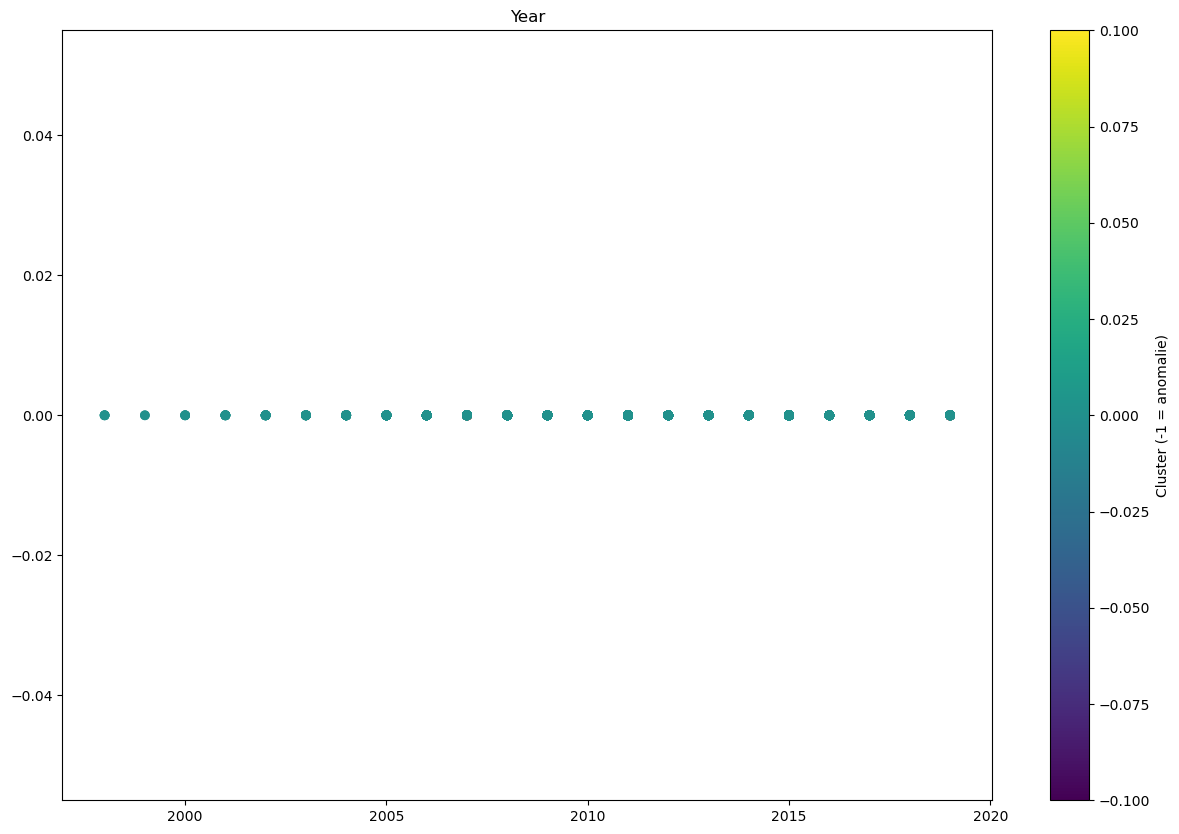

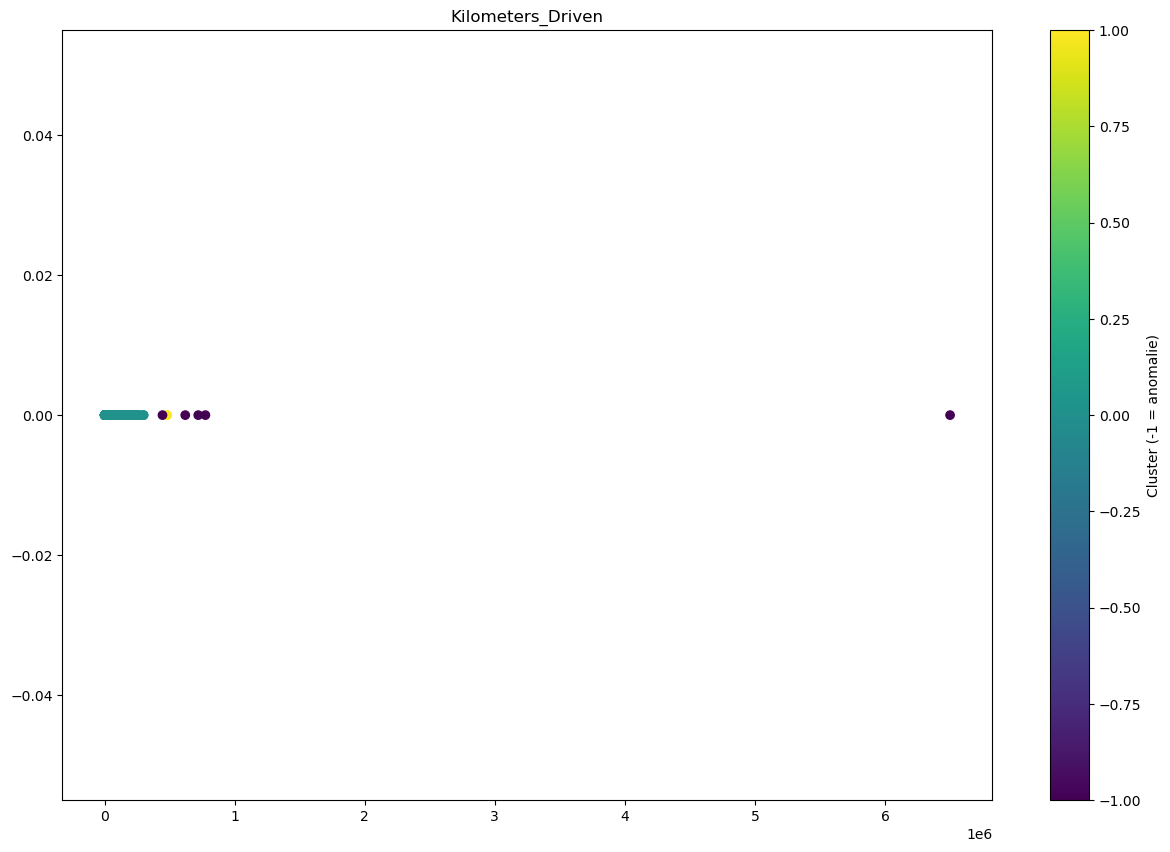

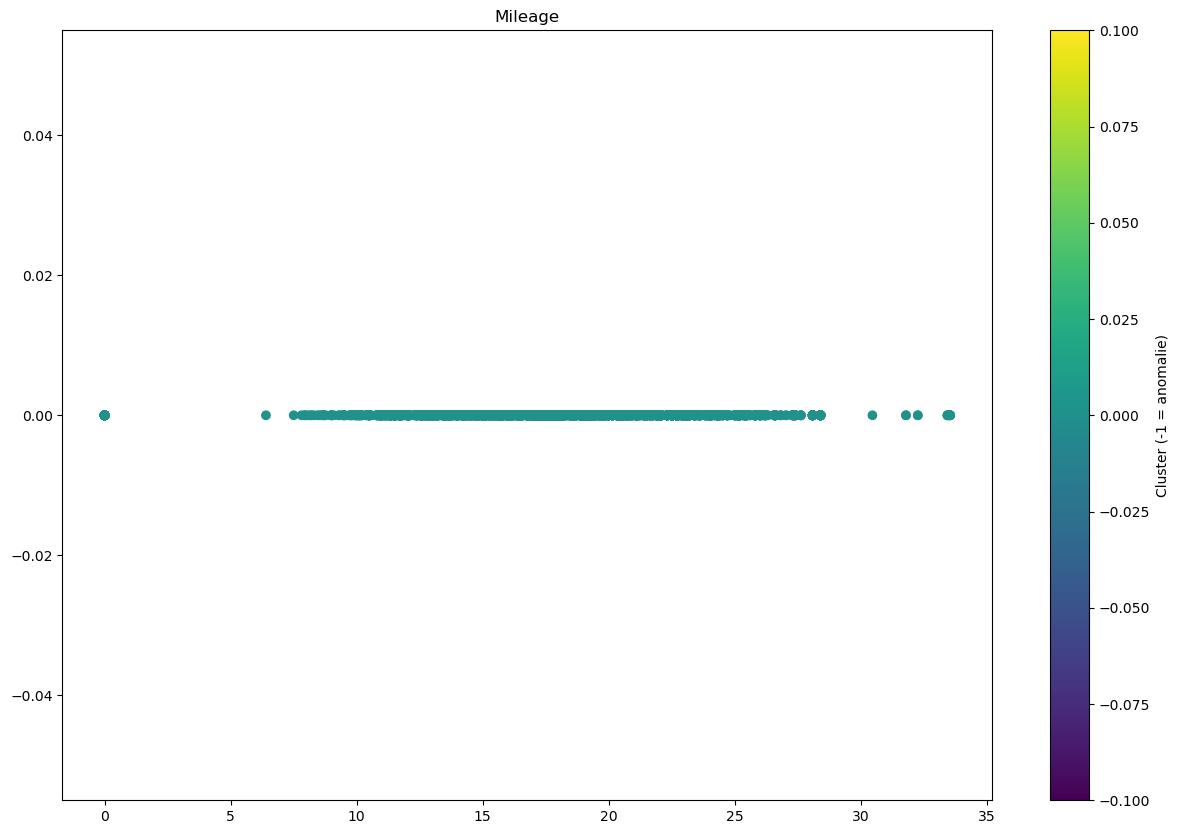

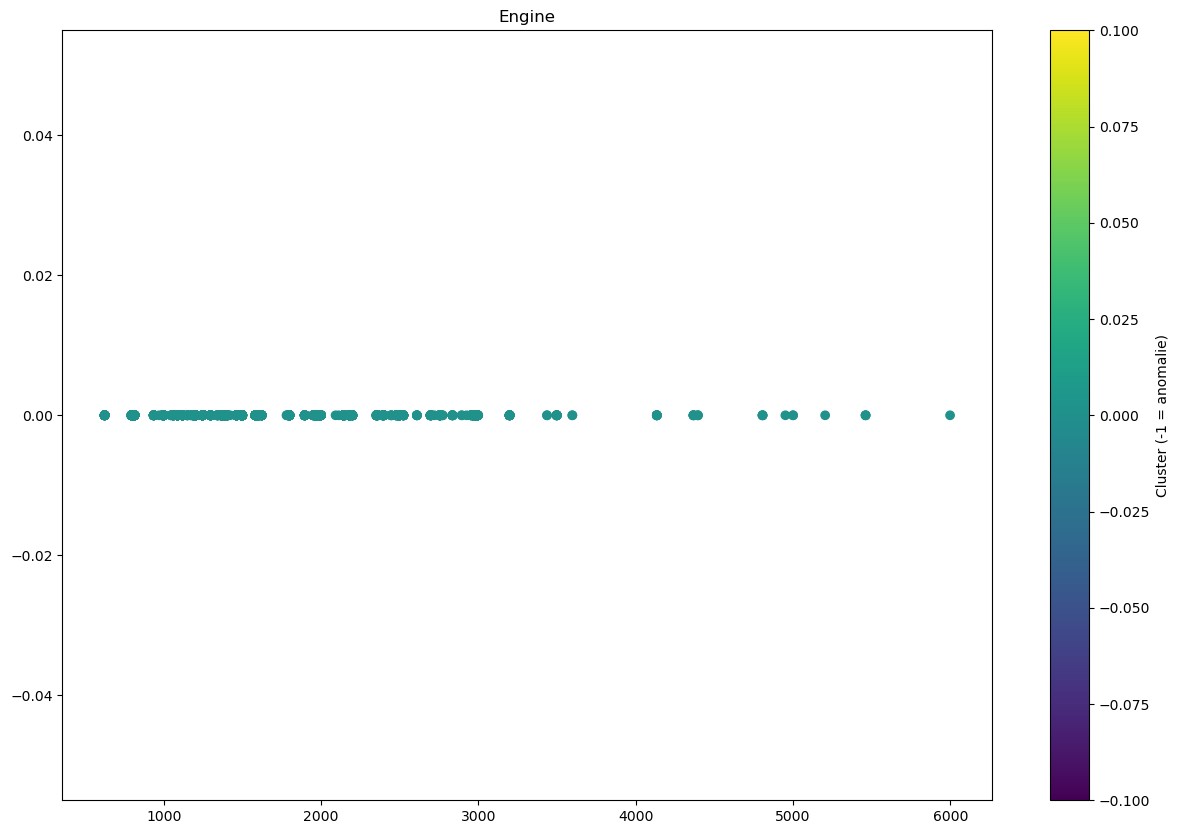

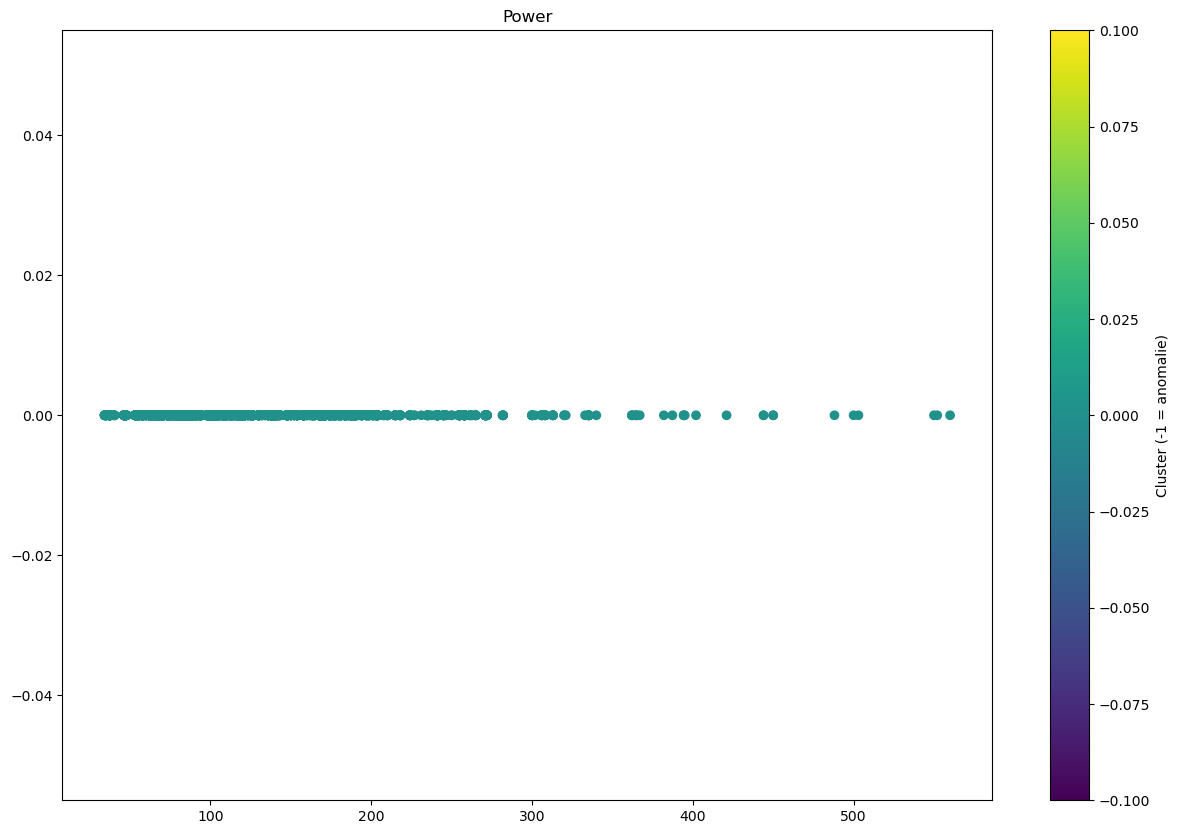

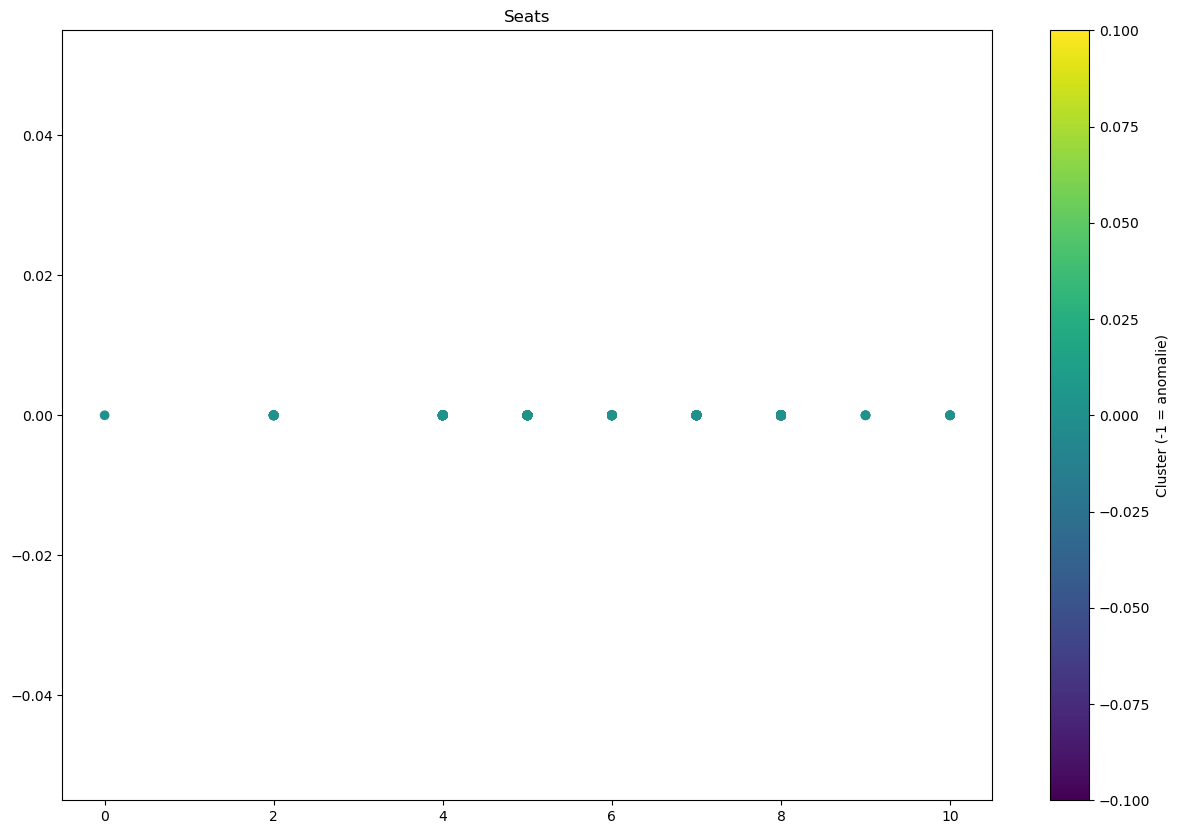

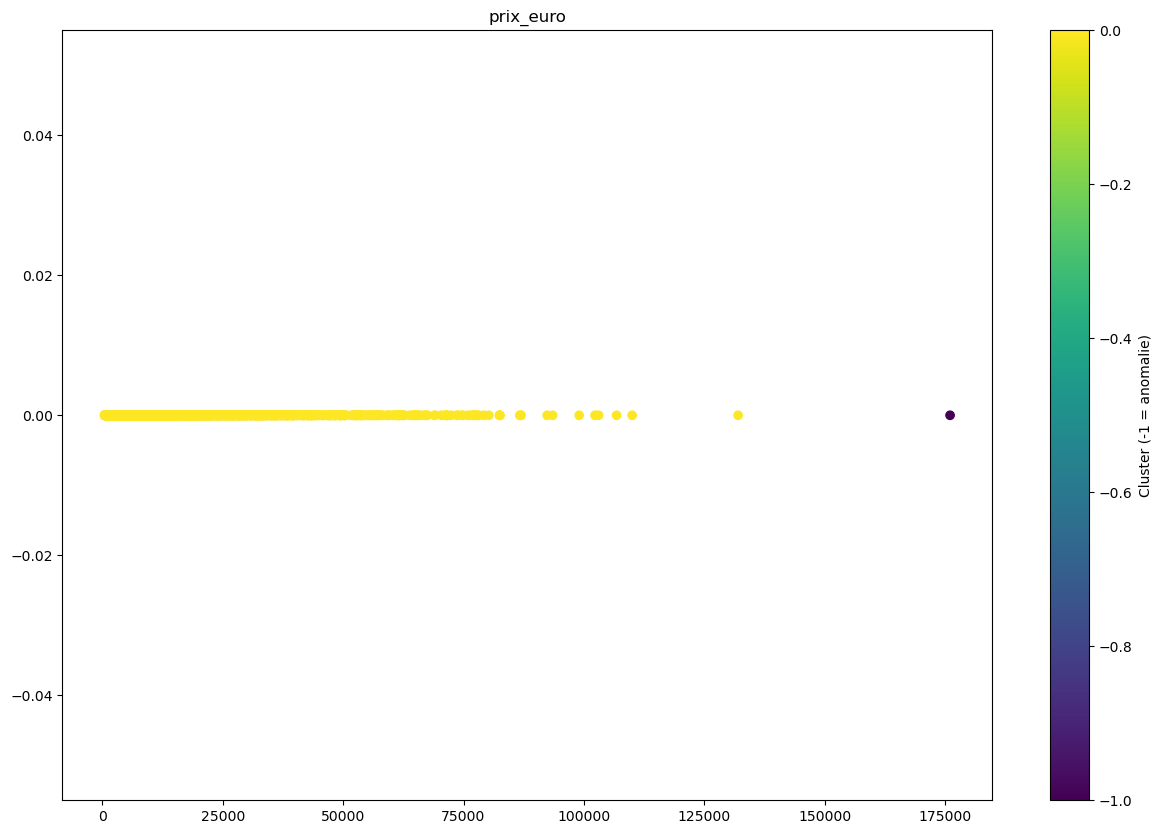

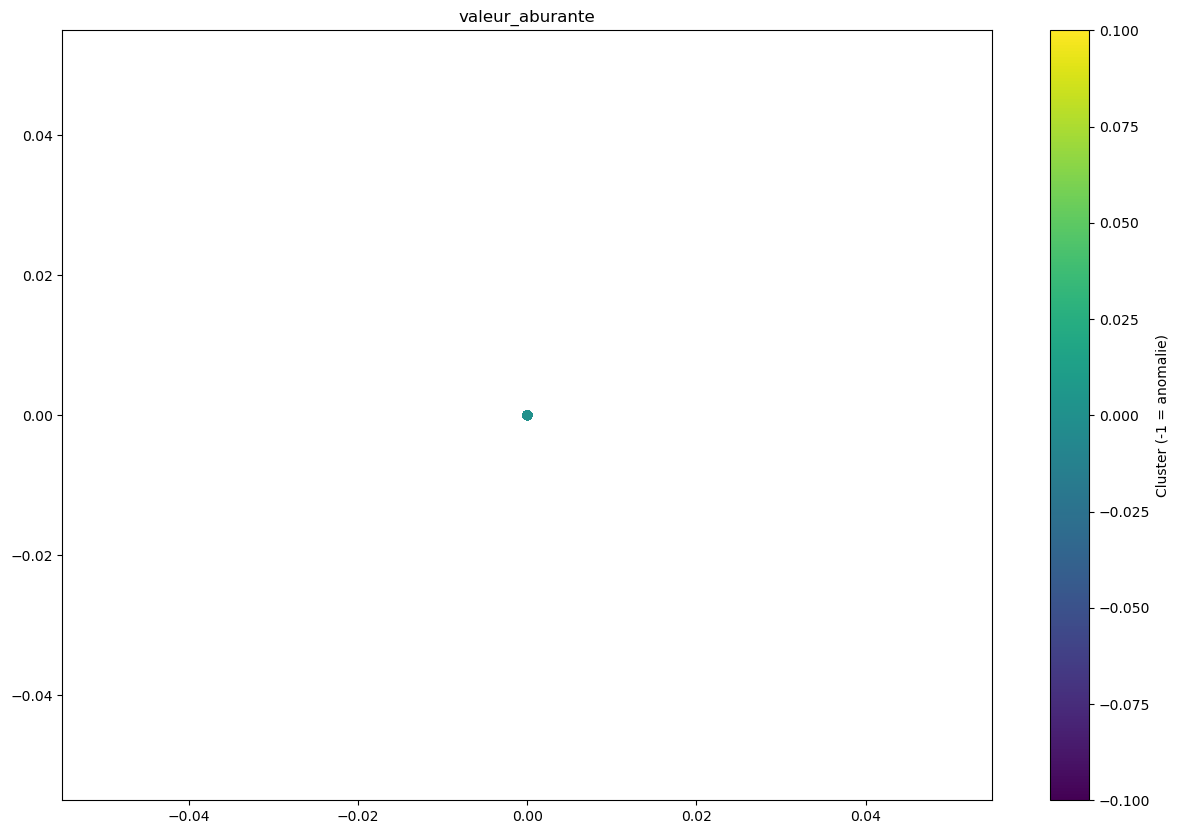

In [85]:
from sklearn.cluster import DBSCAN
import numpy as np

for col in data.select_dtypes(np.number).columns:
    X = data[col].values.reshape(-1, 1)
    db = DBSCAN(eps=30000, min_samples=2).fit(X) 
    data["valeur_aburante"] = db.labels_
    plt.figure(figsize=(15,10))
    plt.title(col)
    plt.scatter(data[col], [0] * len(data), c=data["valeur_aburante"], cmap="viridis", marker="o")
    plt.colorbar(label="Cluster (-1 = anomalie)")
    plt.show()

In [86]:
X = data["Kilometers_Driven"].values.reshape(-1, 1)
db = DBSCAN(eps=30000, min_samples=2).fit(X) 
data["valeur_aburante"] = db.labels_

In [87]:
data[data["valeur_aburante"] == -1]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele,valeur_aburante
340,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,8250.0,Skoda Octavia,-1
358,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,2970.0,Hyundai i10,-1
1860,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,6490.0,Volkswagen Vento,-1
2328,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,71500.0,BMW X5,-1
4491,2013,445000,Petrol,Manual,First,18.50,1197.0,82.9,5.0,4895.0,Hyundai i20,-1


In [92]:
data[data["prix_euro"] == data["prix_euro"].max()]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele,valeur_aburante
4079,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,176000.0,Land Rover,0


In [93]:
# drop les valeur aburante dans la colonne "Kilometers_Driven"
data.drop([340,358,1860,2328,4491,4079], axis=0, inplace=True)

In [95]:
data.drop("valeur_aburante", axis=1, inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6011 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6011 non-null   int64  
 1   Kilometers_Driven  6011 non-null   int64  
 2   Fuel_Type          6011 non-null   object 
 3   Transmission       6011 non-null   object 
 4   Owner_Type         6011 non-null   object 
 5   Mileage            6011 non-null   float64
 6   Engine             6011 non-null   float64
 7   Power              6011 non-null   float64
 8   Seats              6011 non-null   float64
 9   prix_euro          6011 non-null   float64
 10  marque_modele      6011 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 563.5+ KB


In [98]:
data.to_csv("data_nan_remplit_main.csv", index=False)